## Graficar y analizar datos de electrocardiograma (ECG) y estimación de frecuencia cardiaca
IE-0247 Señales y Sistemas 1
##### Proyecto 1 Segunda parte

##### Jean Antonio Zúñiga Mendoza, C18767.



8 de octubre de 2023

### Configuración el cuaderno:
En este cuaderno, se reúne el código de la etapa 1 y 2 del presente proyecto, en el que se detallará las etapas del código y su relación con la interpretación de señales, al igual que los datos obtenidos.

El cuaderno inicia importando las bibliotecas de Python necesarias para realizar operaciones matemáticas, gráficos; adaptando el formato y el tamaño de las figuras generadas, así como el tamaño de las etiquetas y títulos de estos. Así como otras bibliotecas que pueden resultar de ayuda para la modificación a futuro del código.

In [63]:
# Imports python libraries
import numpy as np
import random as rd
import wave
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.signal import butter, lfilter, filtfilt #for filtering data
from statistics import stdev
sys.path.insert(1, r'./../functions') # add to pythonpath

# commands to create high-resolution figures with large labels
%config InlineBackend.figure_formats = {'png', 'retina'} 
plt.rcParams['axes.labelsize'] = 16 # fontsize for figure labels
plt.rcParams['axes.titlesize'] = 18 # fontsize for figure titles
plt.rcParams['font.size'] = 14 # fontsize for figure numbers
plt.rcParams['lines.linewidth'] = 1.4 # line width for plotting

Se declara la función ecg(variable) para poder cargar y procesar un archivo de audio en formato '.wav'
La variable llamada 'variable' proporciona la ruta de los archivos '.wav'. Esto significa que el parámetro que recibe la función 'ecg' no se usa en la función en sí, ya que se ha reemplazado con una ruta fija.
Luego, la función abre el archivo '.wav' especificado utilizando la biblioteca wave.

Ahora, se obtiene información sobre el archivo de audio, como el número de canales (para este caso solo un canal de audio), el número de fotogramas (la duración del archivo), la frecuencia de muestreo (en Hz) y el ancho de muestra (el número de bytes del audio).



El método 'readframes' lee los datos de audio en bytes. La cantidad de bytes leídos es igual a 'numFrames * numChannels' y luego se almacena en la variable dstr.

Luego convierte los archivos en bytes en un arreglo numpy de tipo np.int16 (16 bits). Este formato es comúnmente utilizado en archivos '.wav'.
Esto se almacena en waveData

Finalmente, la función crea otro arreglo 'timeECG' que representa el tiempo en segundos para cada punto de datos en el archivo de audio.
Así que la función devuelve dos valores: wavadata y timeECG, representando los datos de audio y el tiempo.

In [64]:
#Function that extracts the number of recording channels, sampling rate, time and signal
#variable is the path and filename of the .wav file

def ecg(variable):
    variable = "C:\\Users\\Jean2\\OneDrive\Documentos\\Ingeniería Eléctrica\\Señales y Sistemas l\\Cod\Audios\\a0001.wav"
    record = wave.open(variable, 'r') # load the data

    # Get the number of channels, sample rate, etc.
    numChannels = record.getnchannels() #number of channels
    numFrames = record.getnframes() #number of frames
    sampleRate = record.getframerate() #sampling rate
    sampleWidth = record.getsampwidth()
    
    # Get wave data
    dstr = record.readframes(numFrames * numChannels)
    waveData = np.frombuffer(dstr, np.int16)

    # Get time window
    timeECG = np.linspace(0, len(waveData)/sampleRate, num=len(waveData))

    return timeECG, waveData


Se declara una lista llamada 'nice' donde posee elementos que servirán para dar nombre a las gráficas.

Se declara un buble 'for' que toma valores desde 0 hasta 2.
Dentro del bucle, se llama a la función ecg con el nombre del archivo WAV como argumento. El nombre del archivo se construye concatenando el elemento actual de la lista nice con '.wav'. La función ecg carga los datos de audio del archivo 'wav' y devuelve el tiempo (timeECG) y los datos de la señal (waveData).

Luego se grafica con plt.

Nótese que 'plt.plot(timeECG,waveData, 'b')' grafica la forma de onda de la señal de audio utilizando los datos de tiempo y señal cargados previamente.

In [65]:
#Test data
nice = ["pruebabuena1","pruebabuena2", "pruebabuena3"]

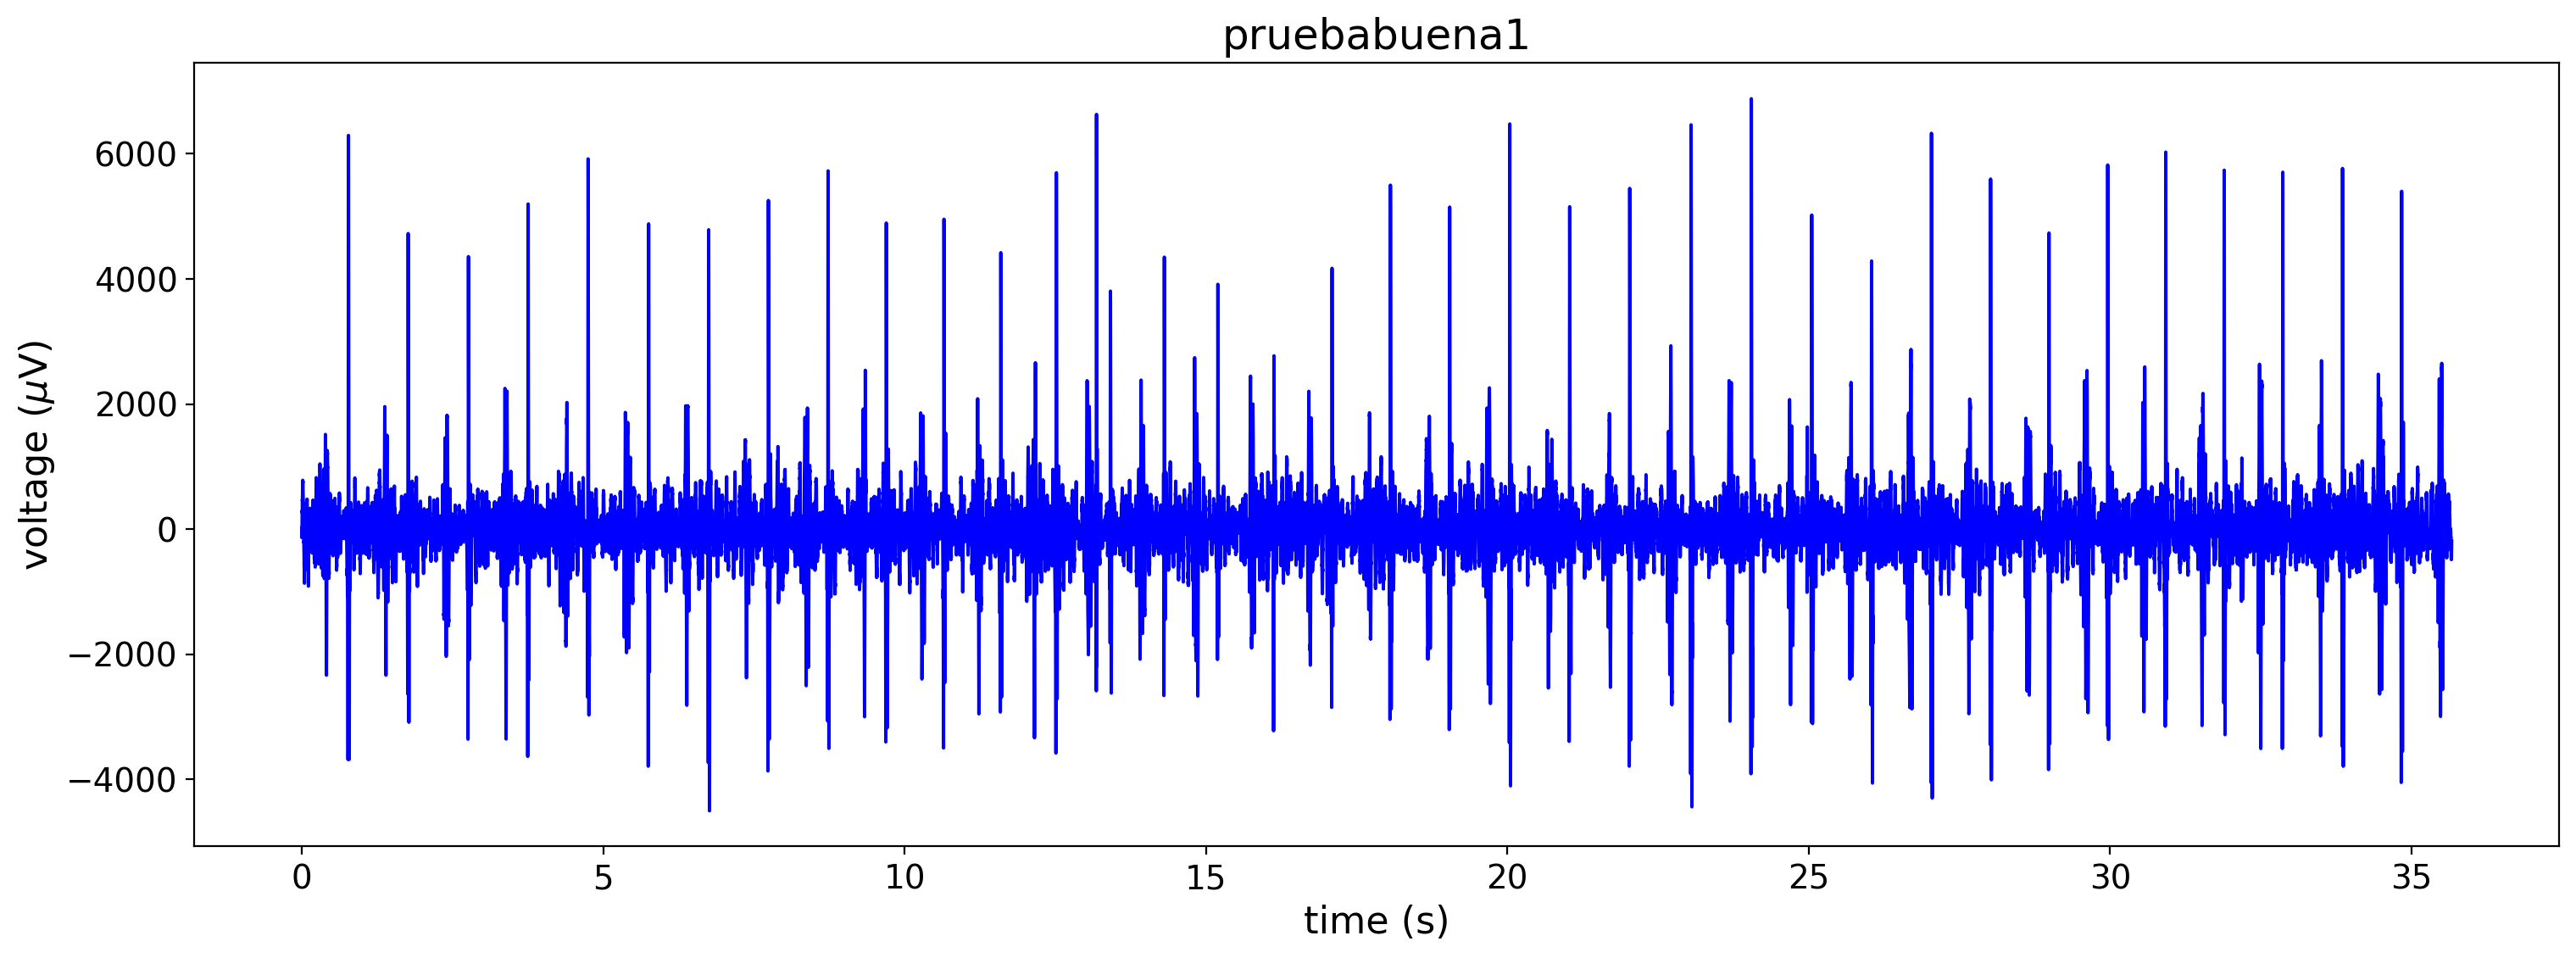

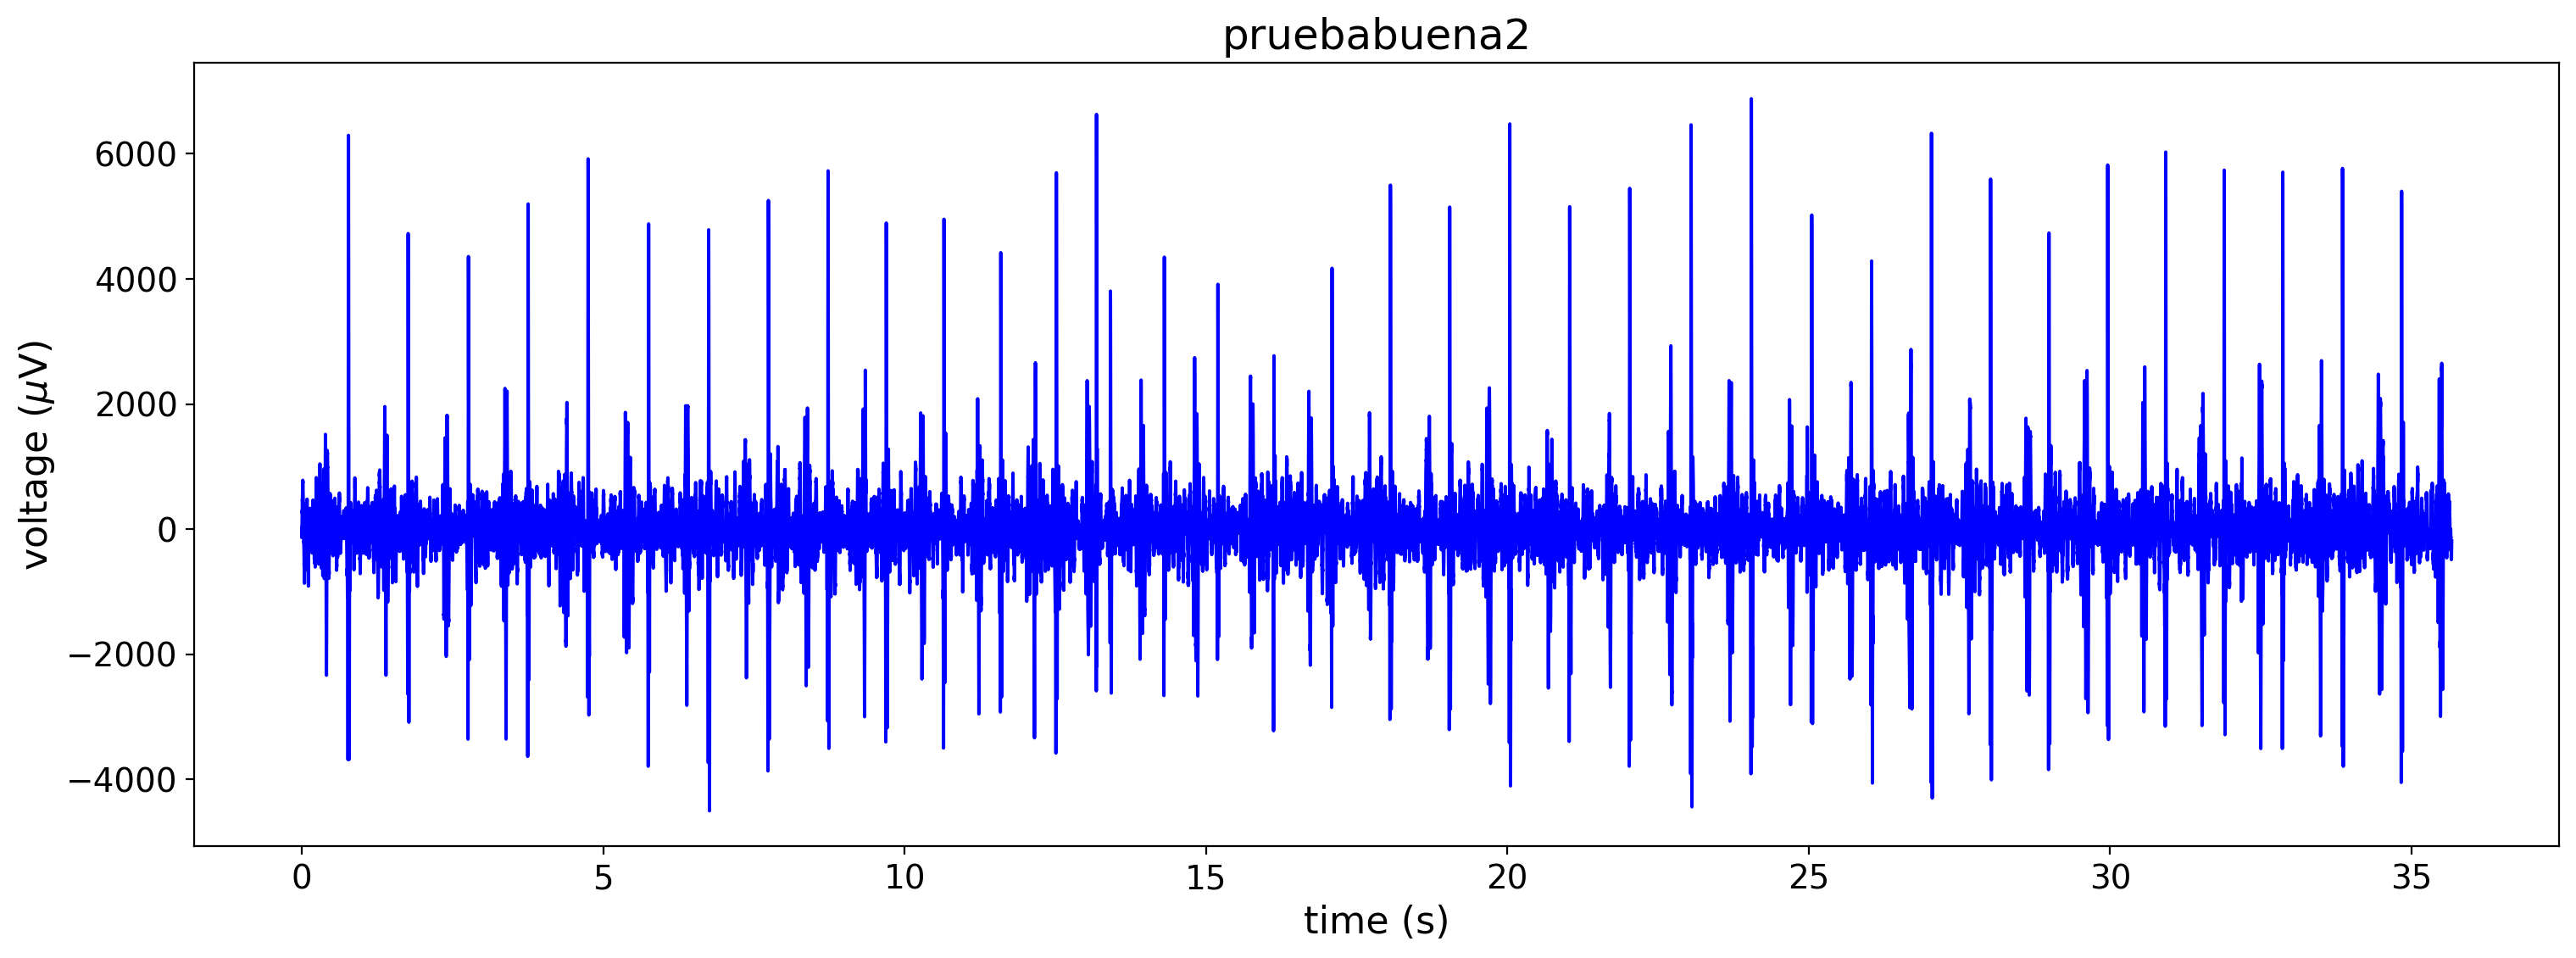

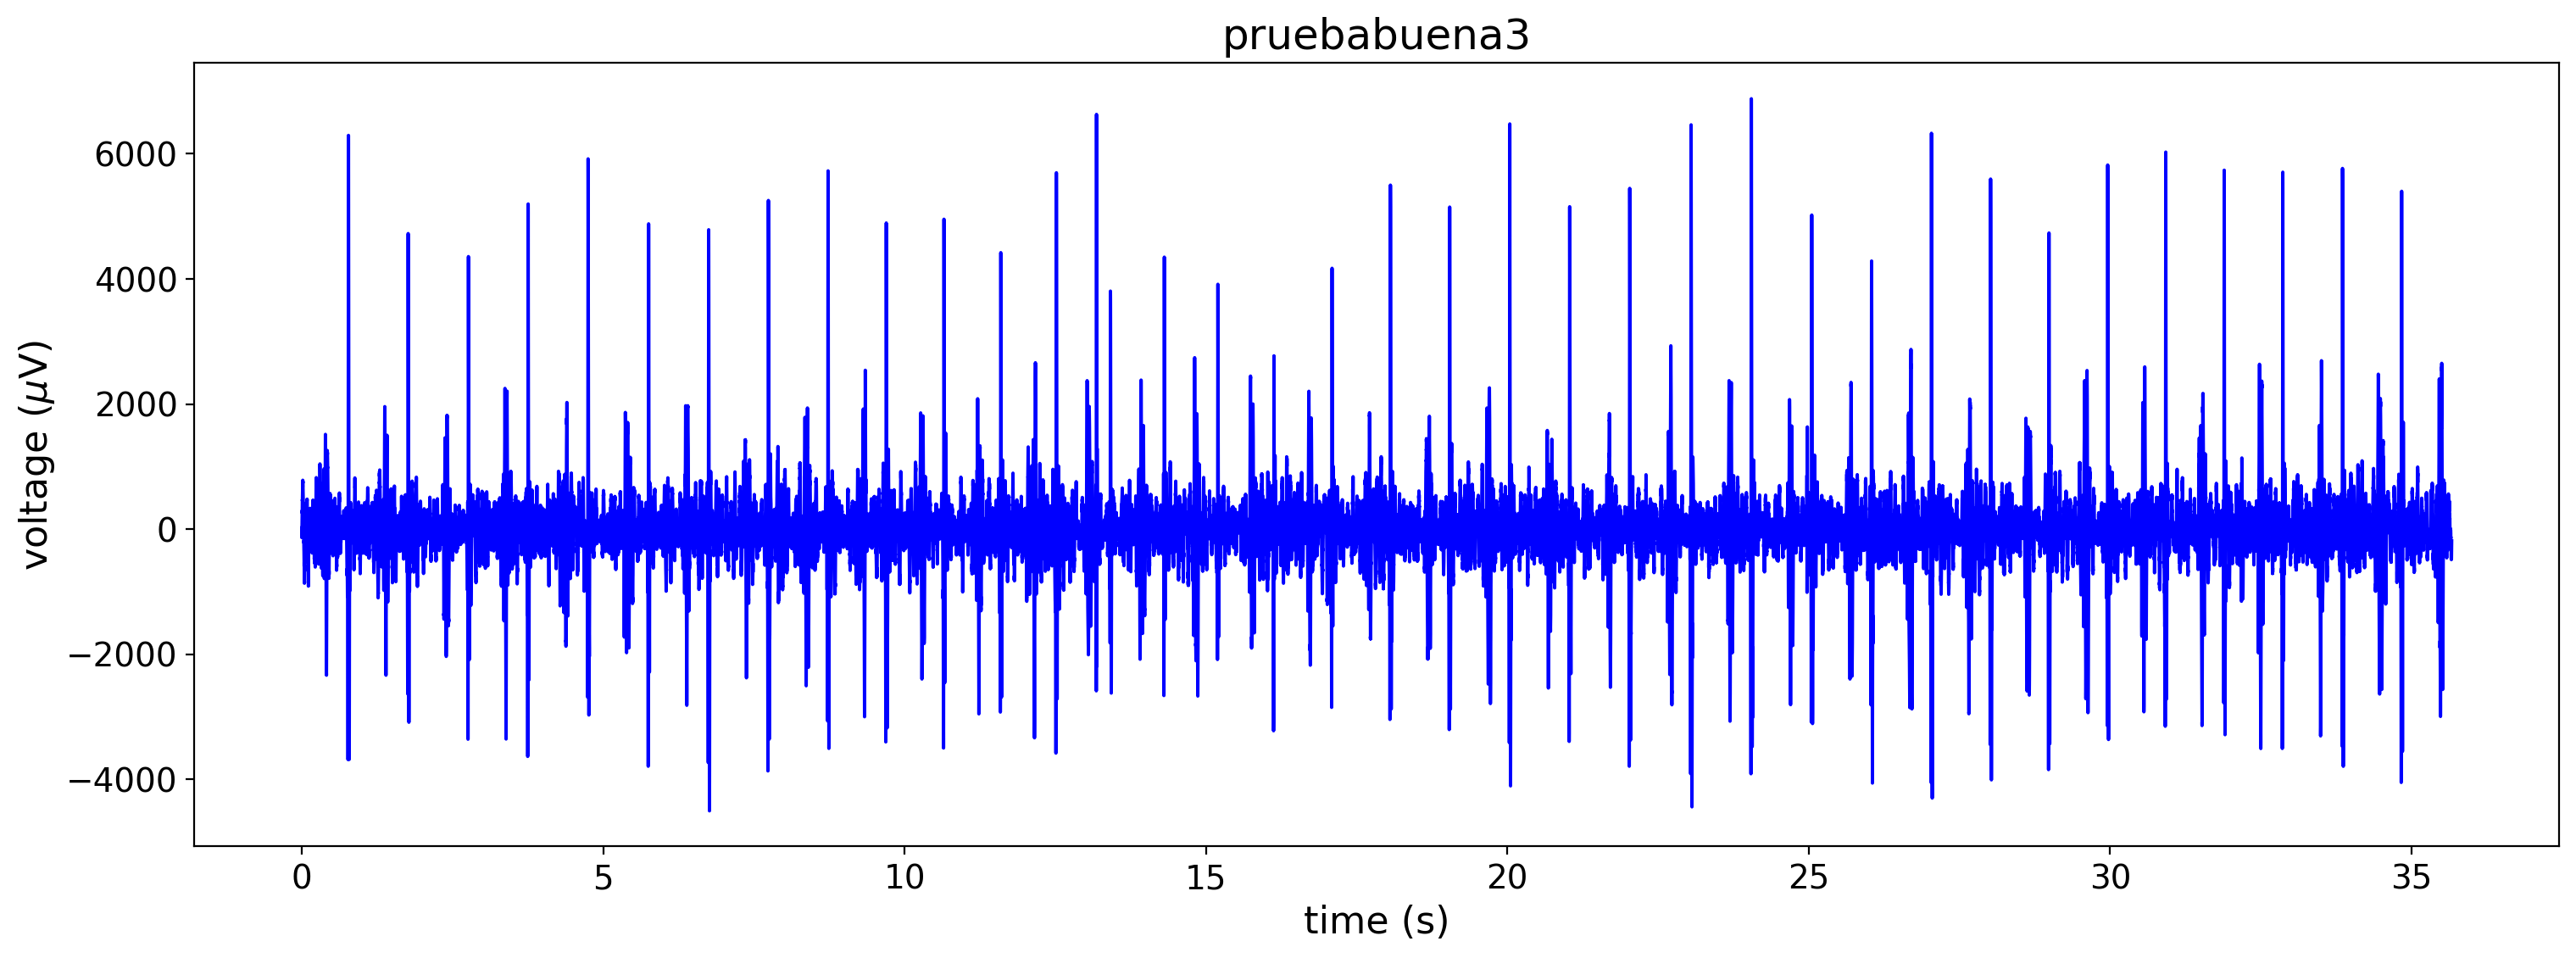

In [66]:
for i in range(0, len(nice)):
    timeECG, waveData = ecg(nice[i]+'.wav')
    # Plotting EMG signal
    plt.figure(figsize=(18,6))
    plt.xlabel(r'time (s)')
    plt.ylabel(r'voltage ($\mu$V)')
    plt.plot(timeECG,waveData, 'b')
    plt.title(nice[i])
    plt.show()



Este fragmento de código es casi igual que el anterior difiriendo en dos cosas: no hace uso de bucles, y la otra es que establece límites en el eje x para mostrar un rango específico de tiempo en la gráfica. Para este caso, la gráfica solo mostrará los intervalos entre 0.40 segundos hasta 5.9 segundos.

Dicho de otra forma, se está ampliando la imagen o expandiendo la señal.

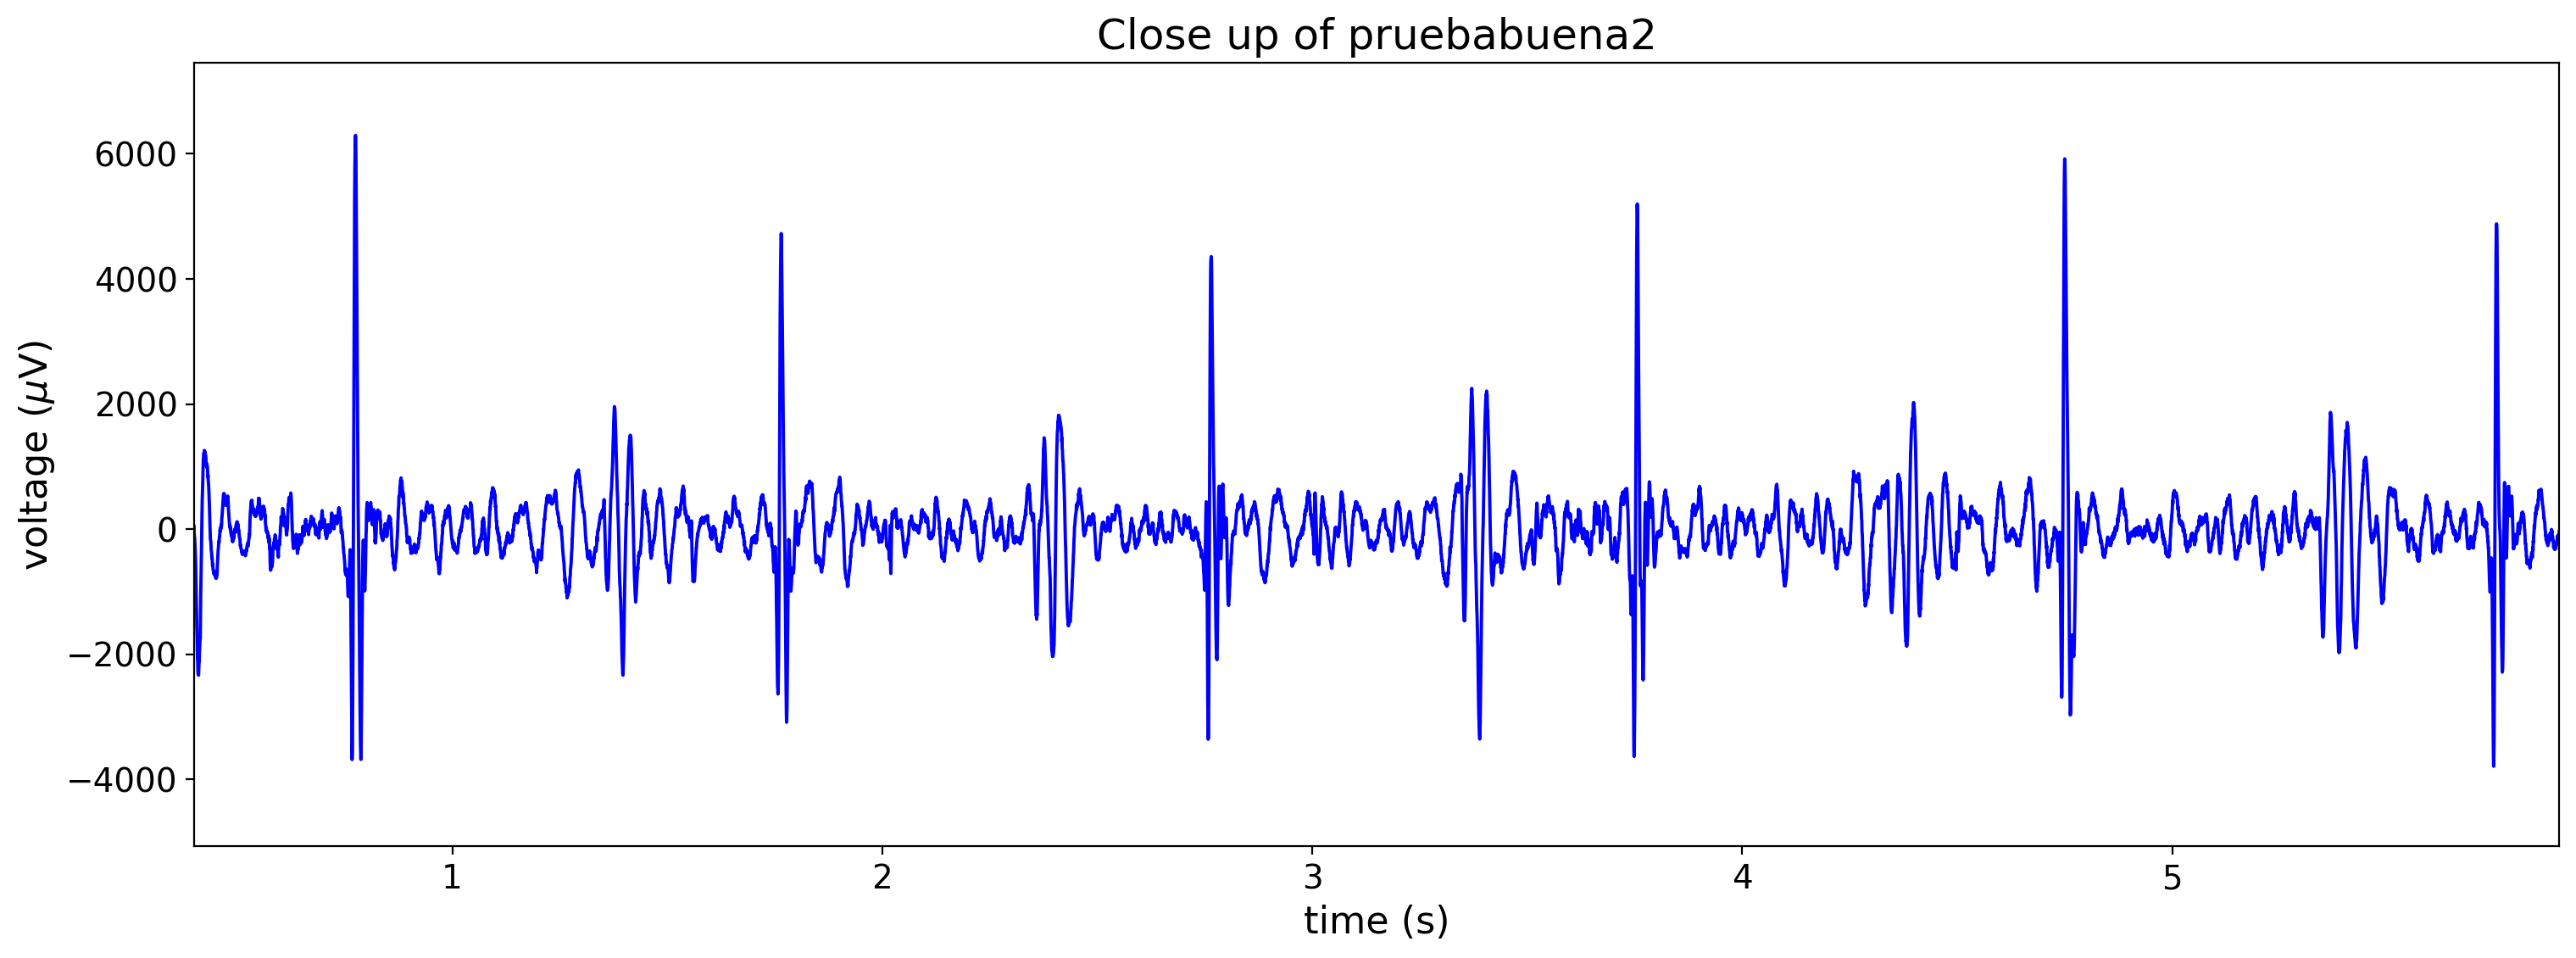

In [67]:
#Obtaining data
timeECG, waveData = ecg("pruebabuena2.wav")

# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(.40,5.9)
plt.title("Close up of pruebabuena2")
plt.show()

En esta sección del código, se busca tener ciclos completos. Por lo que se necesita cortar la grabación estimando el tiempo para completar un ciclo. Sin embargo se tiene que tener cuidado al elegir los valores para no general un error al ejecutar el código.
Más adelante estos valores solo se usarán para delimitar el eje x al igual que la parte anterior.

In [68]:
#Seconds at which we are going to cut the recording
n1 = .40
n2 = 1.2
m1 = int(n1*10000)
m2 = int(n2*10000)

print(timeECG[m1])
print(timeECG[m2])

2.0000280383003184
6.000084114900955


Esta sección vuelve a graficar la señal delimitada en el x con los valores almacenados en timeECG[m1] hasta timeECG[m2]. Recordando que m1 y m2 son números enteros, se puede editar los límites para una mejor visualización, no necesariamente se tiene que usar timeECG[m1] y timeECG[m2].
Por ejemplo: se puede usar plt.xlim(.40,5.9).

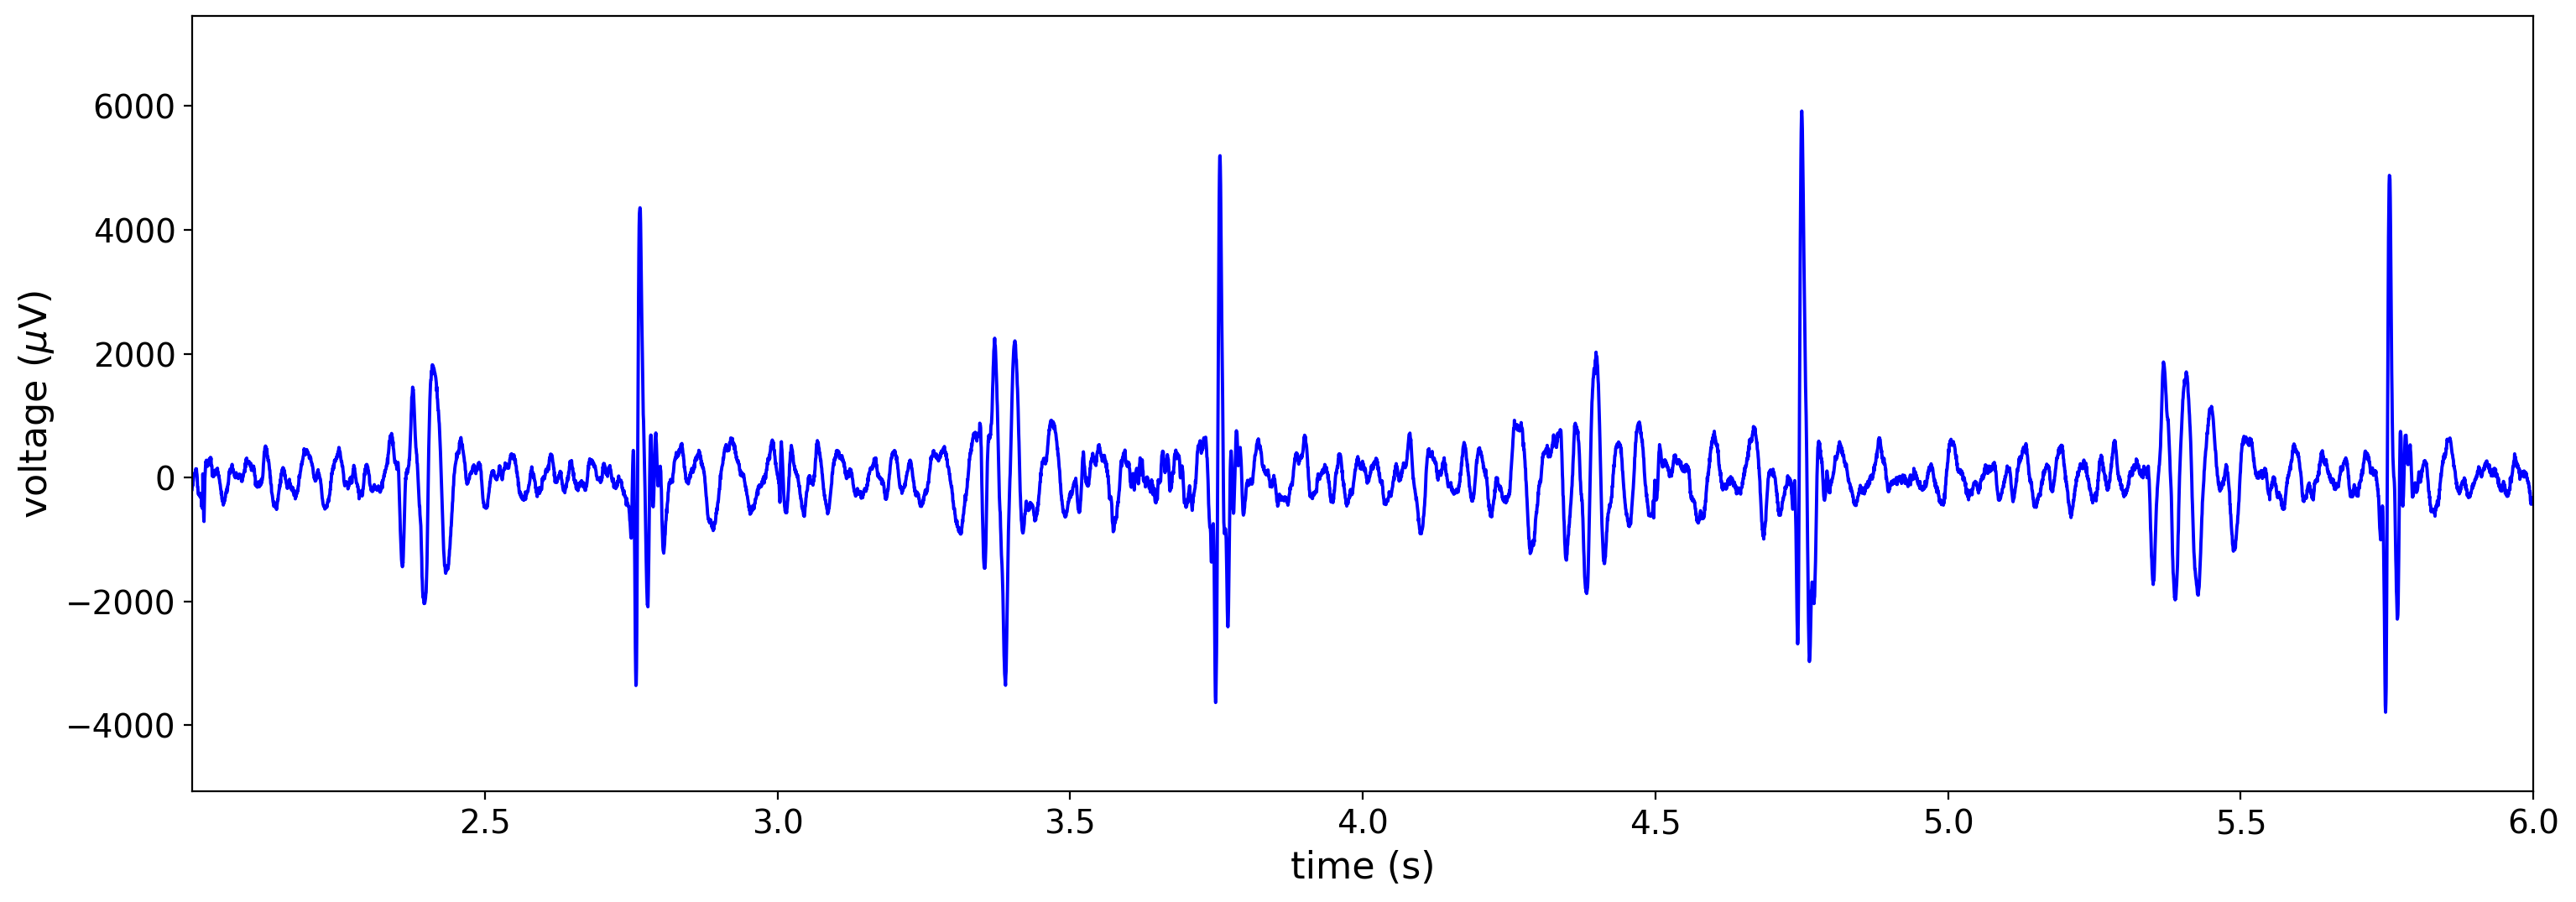

In [69]:
# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.xlim(timeECG[m1],timeECG[m2])
plt.show()

Esta sección crea una nueva lista delimitada por los valores timeECG[m1] hasta timeECG[m2-1]
De esta misma forma lo hace waveData

In [70]:
timeECG, waveData = timeECG[m1:m2], waveData[m1:m2]

En esta sección, crea una lista dentro de los rangos 'm1' a 'm2-1' en timeECG y WaveData respectivamente.

Y procede a graficar con estos nuevos valores.

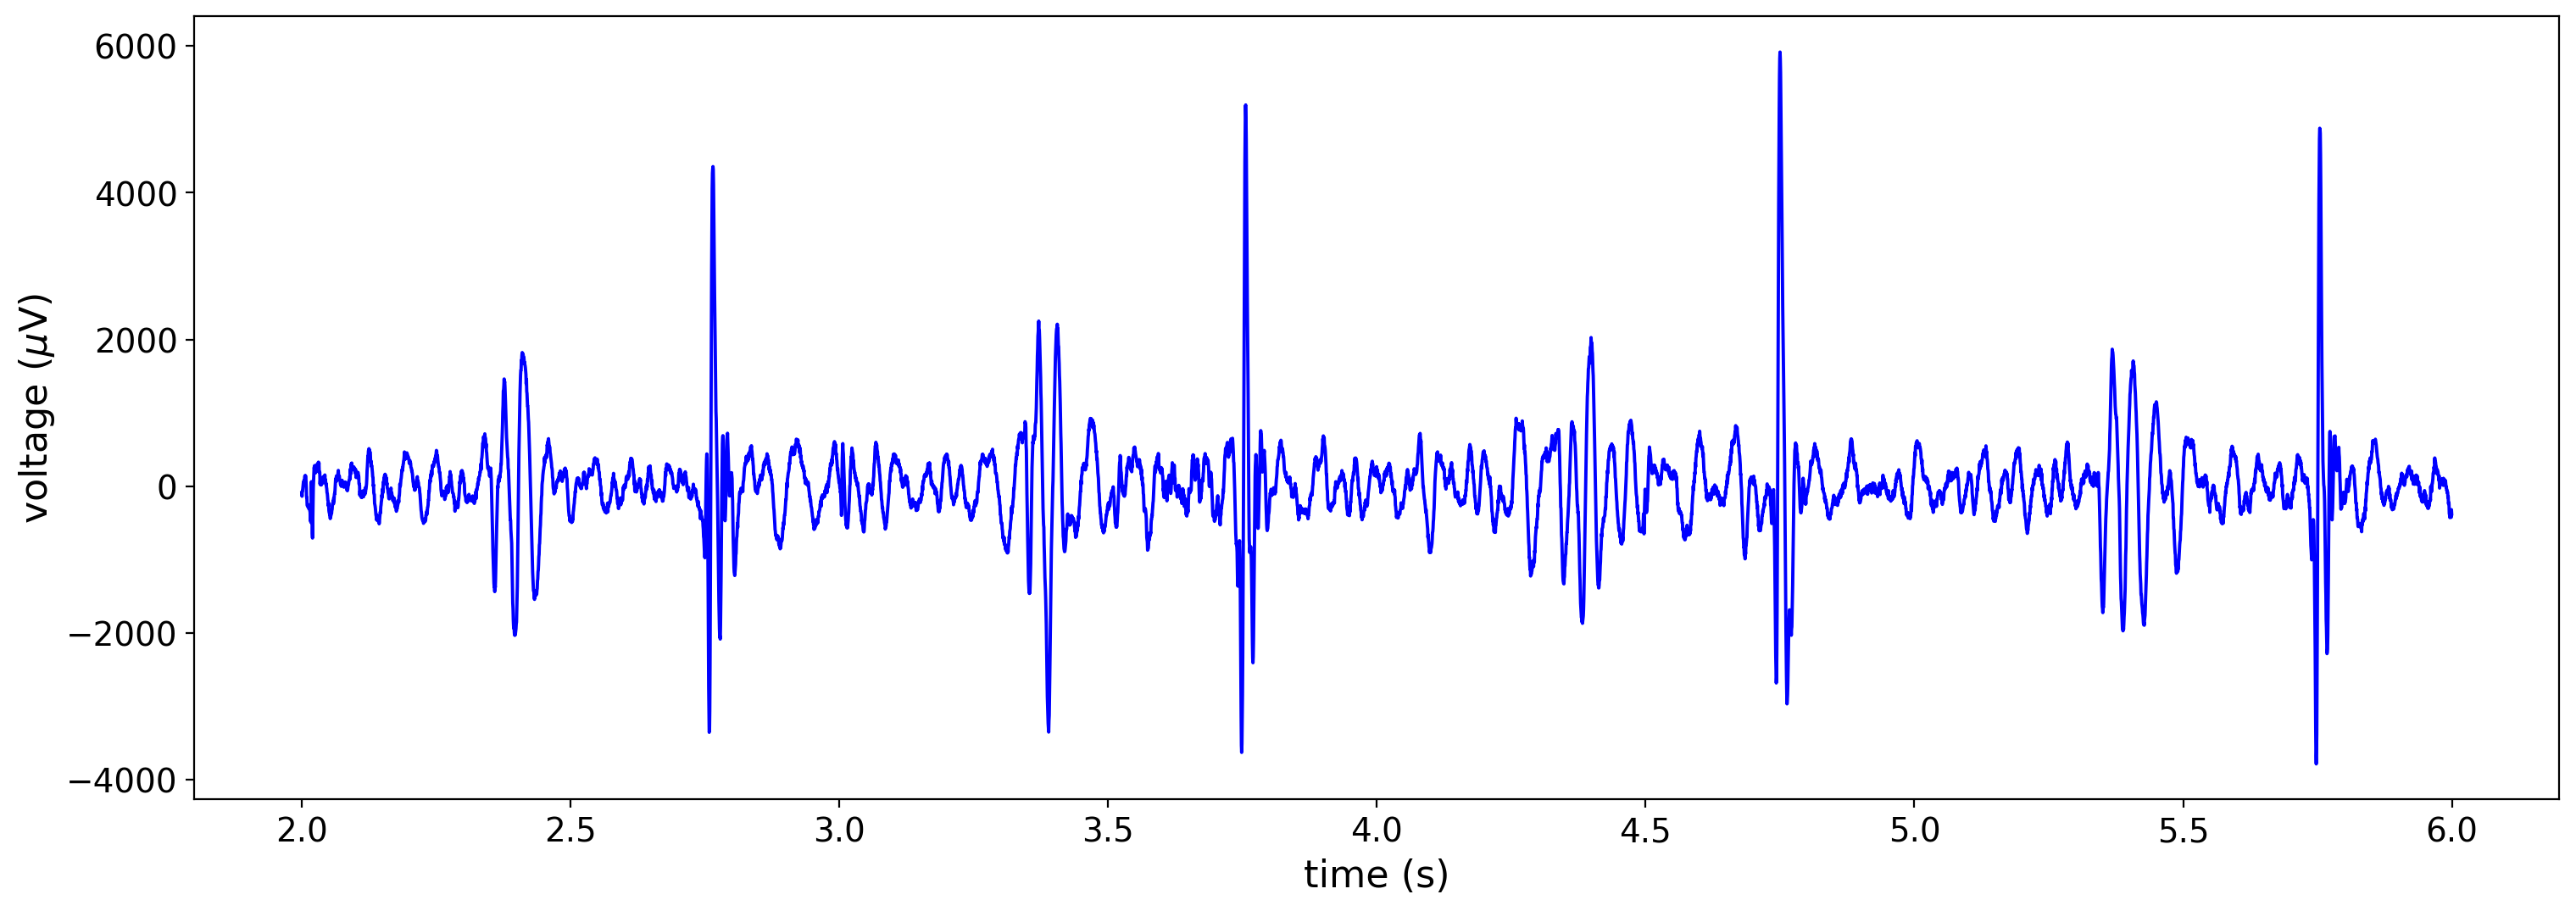

In [71]:
# Plotting EMG signal
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.plot(timeECG,waveData, 'b')
plt.show()

Ahora que se puede ver la gráfica de una mejor manera, es conveniente crear una función que nos permita ver explícitamente los máximos locales.
Se declara una función 'detecta_maximos_locales' que recibe tres parámetros: timeECG, waveData y threshold_ratio = 0.7.

Como Python es un lenguaje interprete, los valores que se encuentran en timeECG y waveData son los mismos que los anteriores.

Lo primero que realiza la función es verificar si las longitudes de timeECG y waveData son iguales. Si no lo son, devuelve una excepción indicando que las dos matrices tienen longitudes diferentes.

Luego, calcula un límite multiplicando 'threshold_ratio' por la diferencia de el valor máximo y el valor mínimo contenidos en wavaData y le suman el minimo en waveData. siguiéndole tres listas vacías: 'maxima', 'maxima_indices' y 'mxs_indices'.

Seguidamente, inicia un ciclo for que inicia en cero hasta la longitud de waveData. Si un valor en 'i' es mayor o igual a el límite (threshold), entonces se considera un máximo local ('banner = True' para indicarnos que estamos en una región de máximo local) y su índice y valor son agregados a las listas 'maxima_indices' y 'maxima'.

Si el valor en waveData es menor que el 'limite', se considera que estamos fuera de la región de máximos locales. Entonces se busca el índice del valor máximo en la lista maxima y se agrega el índice correspondiente en waveData a la lista 'mxs_indices'. Las listas 'maxima' y 'maxima_indices' vuelven a estar vacías y 'banner = False'.

Finalmente, la función devuelve la lista 'mxs_indices' que contiene los máximos locales encontrados en waveData.

In [72]:
def detecta_maximos_locales(timeECG, waveData, threshold_ratio=0.7):
    # If not all the R peaks are detected, lower the threshold_ratio
    # If components that are not R peaks (like T waves) are detected, up the threshold_ratio
    print(len(timeECG), len(waveData))
    
    if len(timeECG) != len(waveData): #Raises an error if two arrays have different lengths
        raise Exception("The two arrays have different lengths.")
    
    interval = max(waveData) - min(waveData)
    threshold = threshold_ratio*interval + min(waveData)
    maxima = []
    maxima_indices = []
    mxs_indices = []
    banner = False
    
    for i in range(0, len(waveData)):
            
        if waveData[i] >= threshold:#If a threshold value is surpassed,
            # the indices and values are saved 
            banner = True
            maxima_indices.append(i)
            maxima.append(waveData[i])
            
        elif banner == True and waveData[i] < threshold: #If the threshold value is crossed
            # the index of the maximum value in the original array is saved
            index_local_max = maxima.index(max(maxima))
            mxs_indices.append(maxima_indices[index_local_max])
            maxima = []
            maxima_indices = []
            banner = False     

    return mxs_indices

In [73]:
mxs_indices = detecta_maximos_locales(timeECG, waveData)

8000 8000


Se Establecen los límites del eje x del gráfico para que abarque desde el mínimo valor hasta el valor máximo dentro de timeECG. Se hace uso de 'plot' para mostrar la gráfica como una línea continua.


Para denotar los máximos locales, se hace uso de 'scatter' que agrega puntos rojos en la gráfica. Estos puntos son obtenidos de las listas de timeECG y waveData utilizando los indices contenidos en 'mxs_indices'.

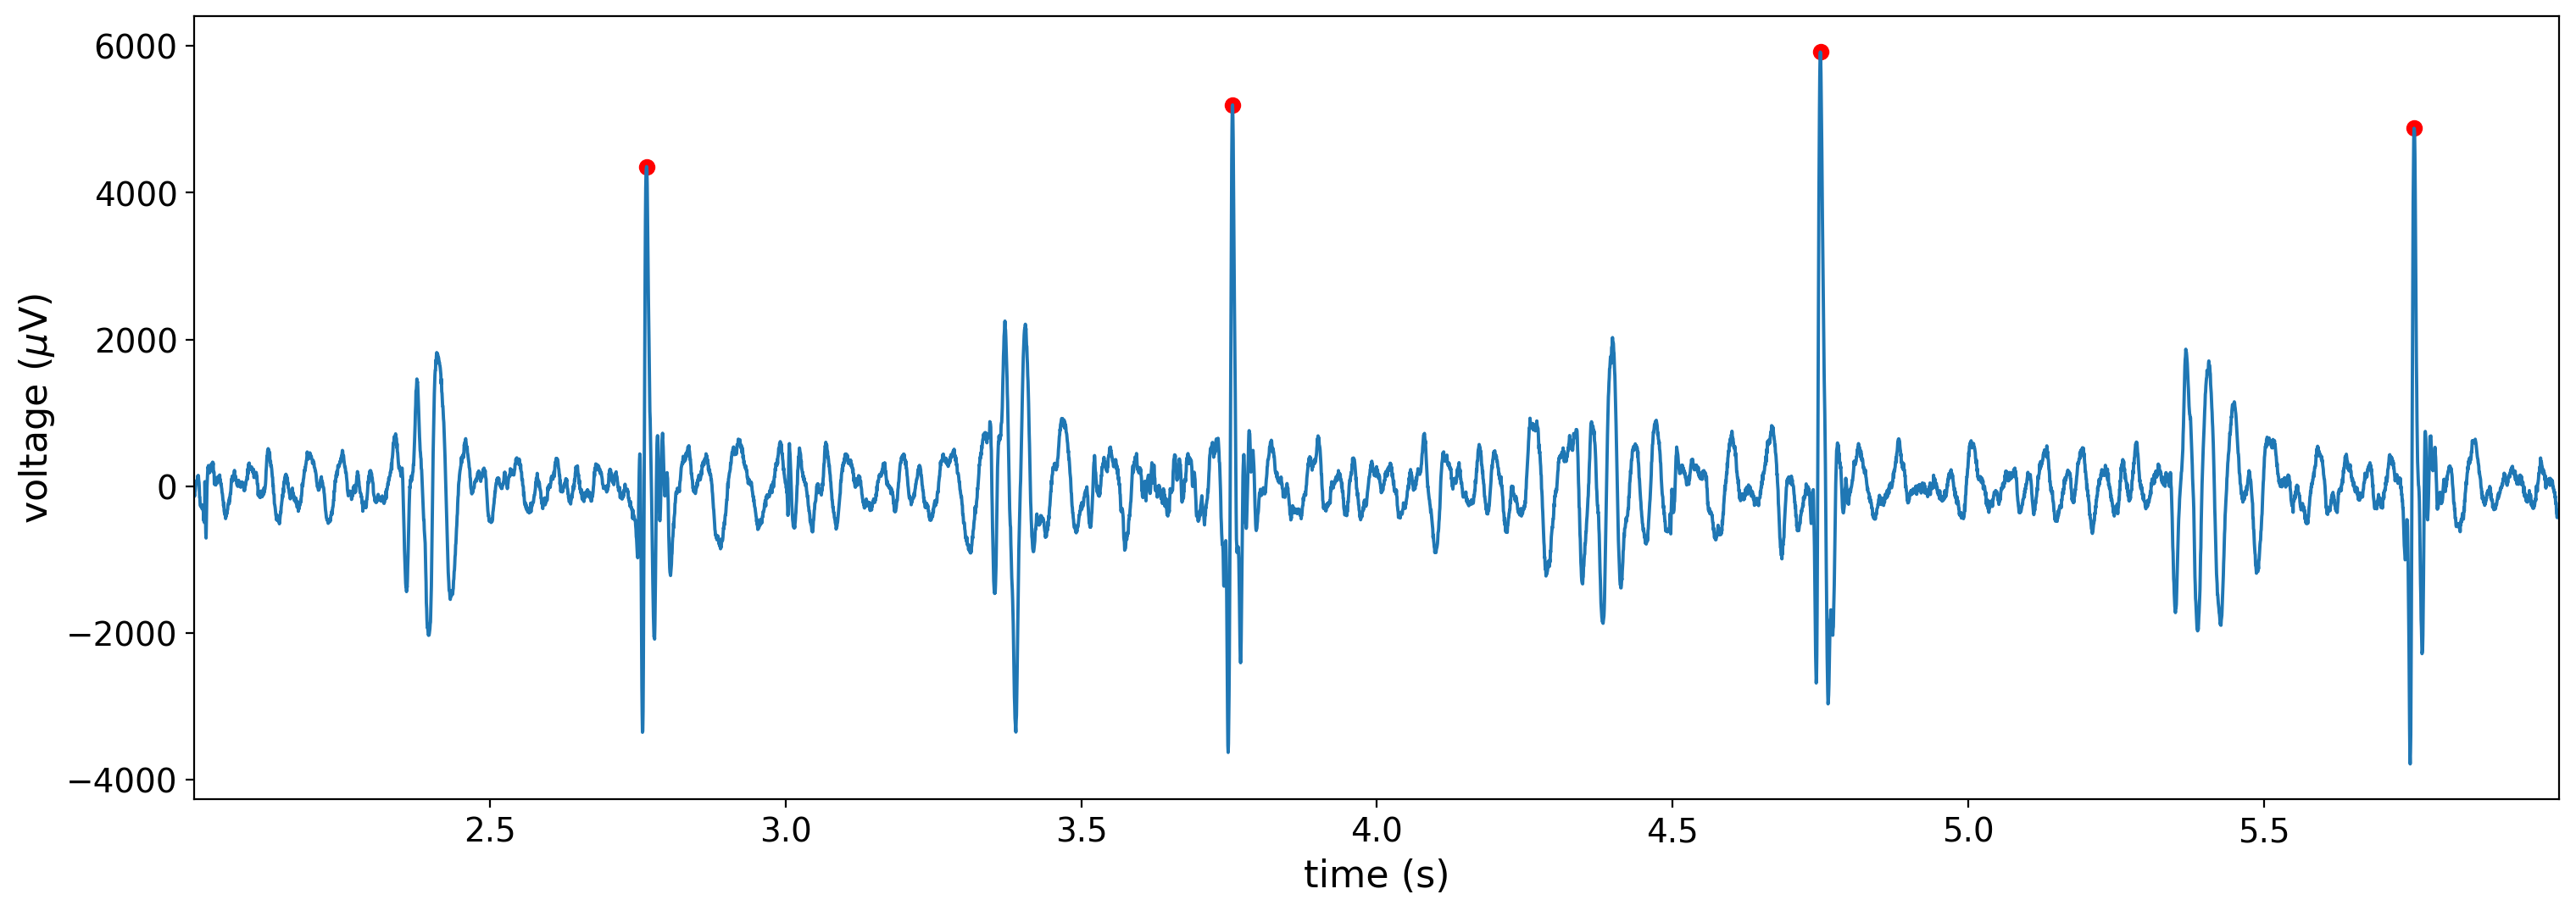

In [74]:
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(min(timeECG),max(timeECG))
plt.plot(timeECG, waveData)
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()

Ya en la recta final, se establece los límites del eje x multiplicando por 10000 para convertir 'end_sec' en índice de la lista.
Luego se traza la señal en función de los intervalos dentro de timeECG y wavaData. Que se vuelven a multiplicar por 10000 para convertir 'end_sec' en índice. 'init_sec0' sigue siendo 0.

De igual forma que la gráfica anterior, muestra los máximos locales con puntos rojos en el nuevo intervalo.

Para este caso, 'end_sec' se multiplica por 1000 para evitar acceder a una posición fuera de los límites de timeECG y waveData.

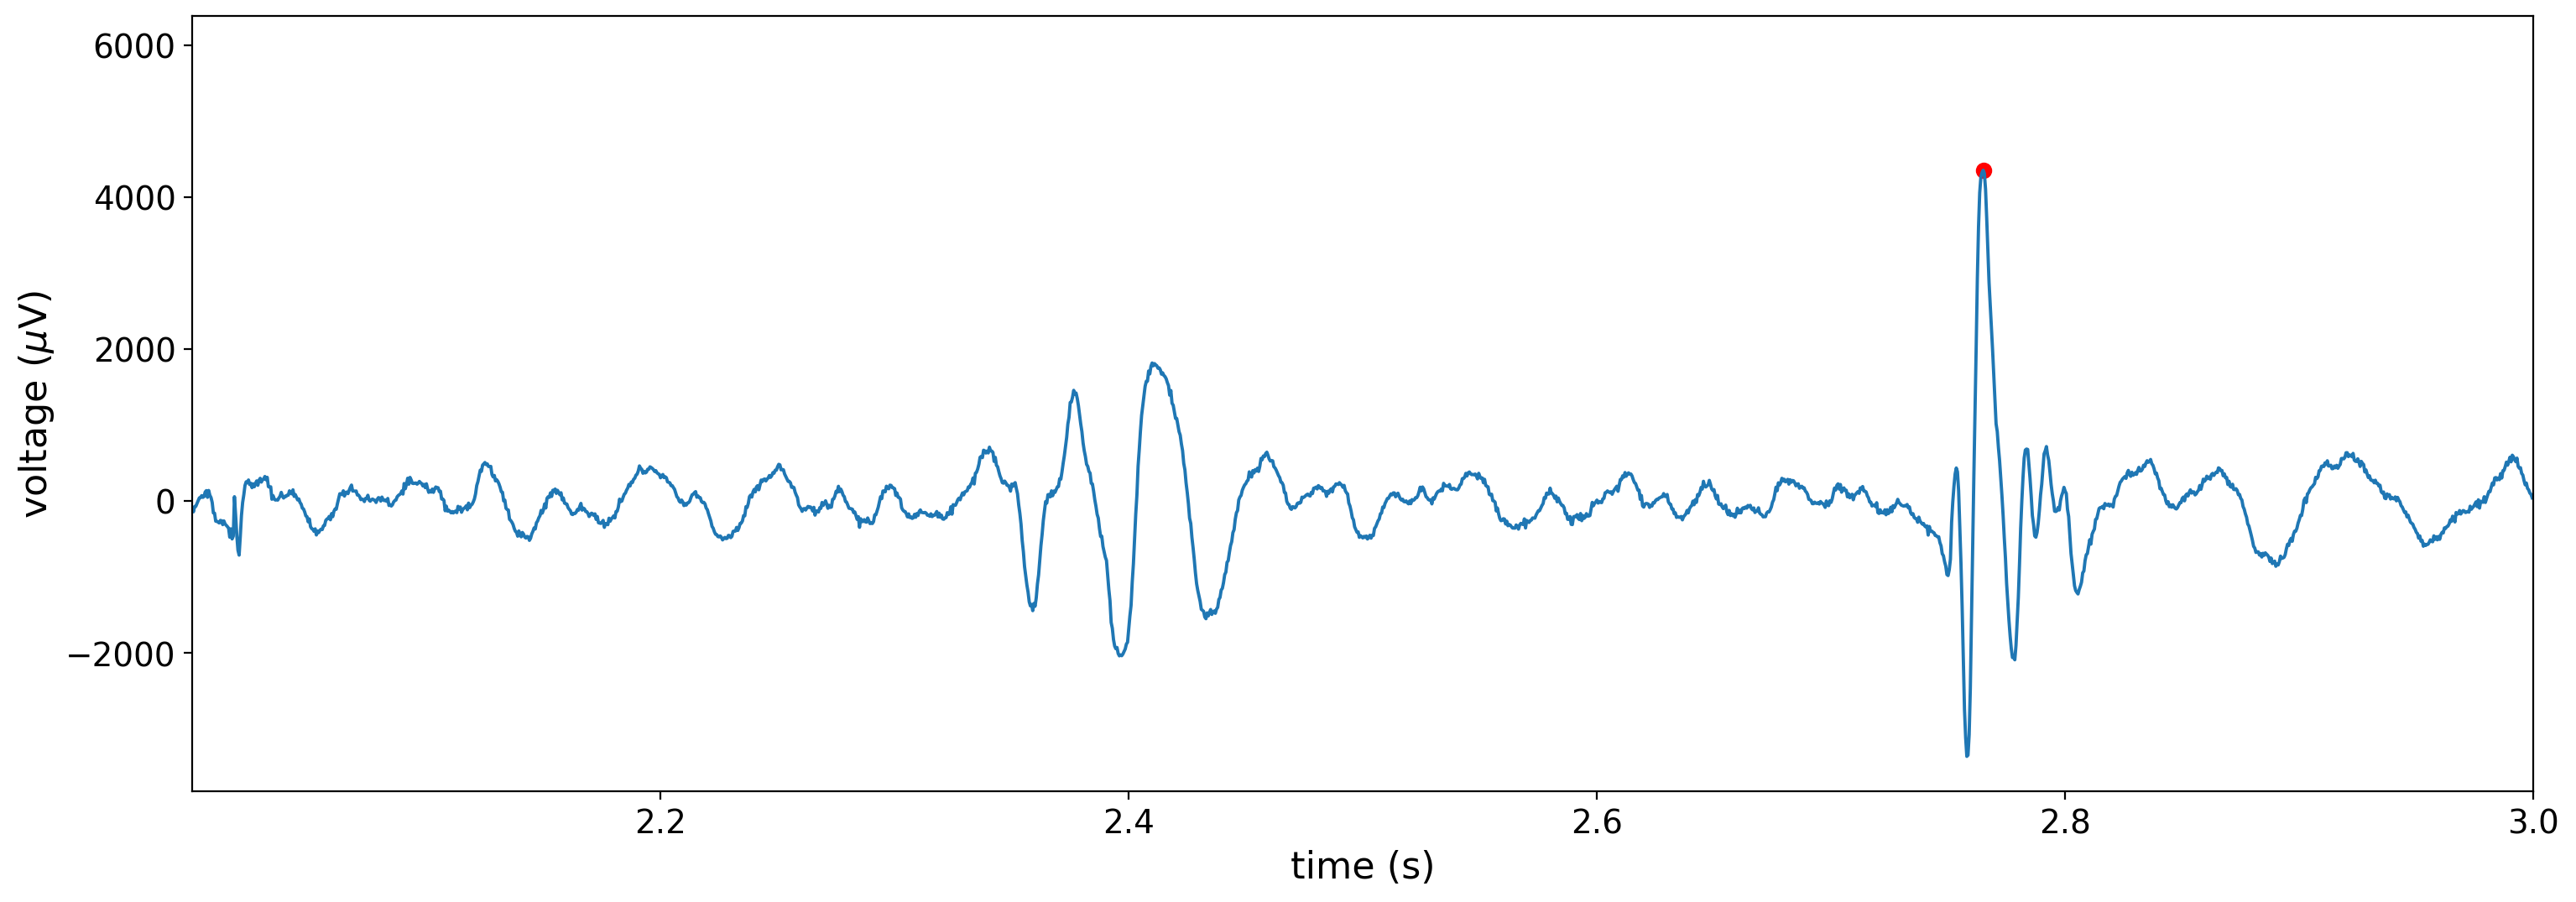

In [75]:
# Close up from an initial second to an end second
init_sec = 0
end_sec = 2
plt.figure(figsize=(18,6))
plt.xlabel(r'time (s)')
plt.ylabel(r'voltage ($\mu$V)')
plt.xlim(timeECG[init_sec*10000],timeECG[end_sec*1000])
plt.plot(timeECG[init_sec*10000:end_sec*1000], waveData[init_sec*10000:end_sec*1000])
plt.scatter(timeECG[mxs_indices], waveData[mxs_indices], color='r')
plt.show()


## Heart frequency

Finalmete, se calcula la frecuencia cardiaca media en BPM calculando la longitud de 'mxs_indices' multiplicando por 60 (para pasar de segundos a minutos) dividido entre la diferencia del último y primer valor contenidos en timeECG y se imprime su resultado.

In [76]:
mean_bpm = 60*(len(mxs_indices)/(timeECG[-1]-timeECG[0]))
print("Beats per minute:", mean_bpm)

Beats per minute: 60.006659695244394


También, haciendo uso del ciclo for, se puede calcular la frecuencia cardiaca en BPM entre cada par de máximos locales consecutivos en la señal, así como la desviación estándar.

In [77]:
heart_rate = [(60/(timeECG[mxs_indices[i+1]]-timeECG[mxs_indices[i]])) \
              for i in range(0, len(mxs_indices)-1)]
time = timeECG[mxs_indices]

mean_vec = [mean_bpm for i in range(0, len(time)-1)]
std_vec_plus = [mean_bpm+stdev(heart_rate) for i in range(0, len(time)-1)]
std_vec_minus = [mean_bpm-stdev(heart_rate) for i in range(0, len(time)-1)]

Para luego poder expresar los valores en un grafico.

Para el caso de algunas señales, se tendrá que modificar el límite en el eje 'y' y así poder observar la información de mejor manera.

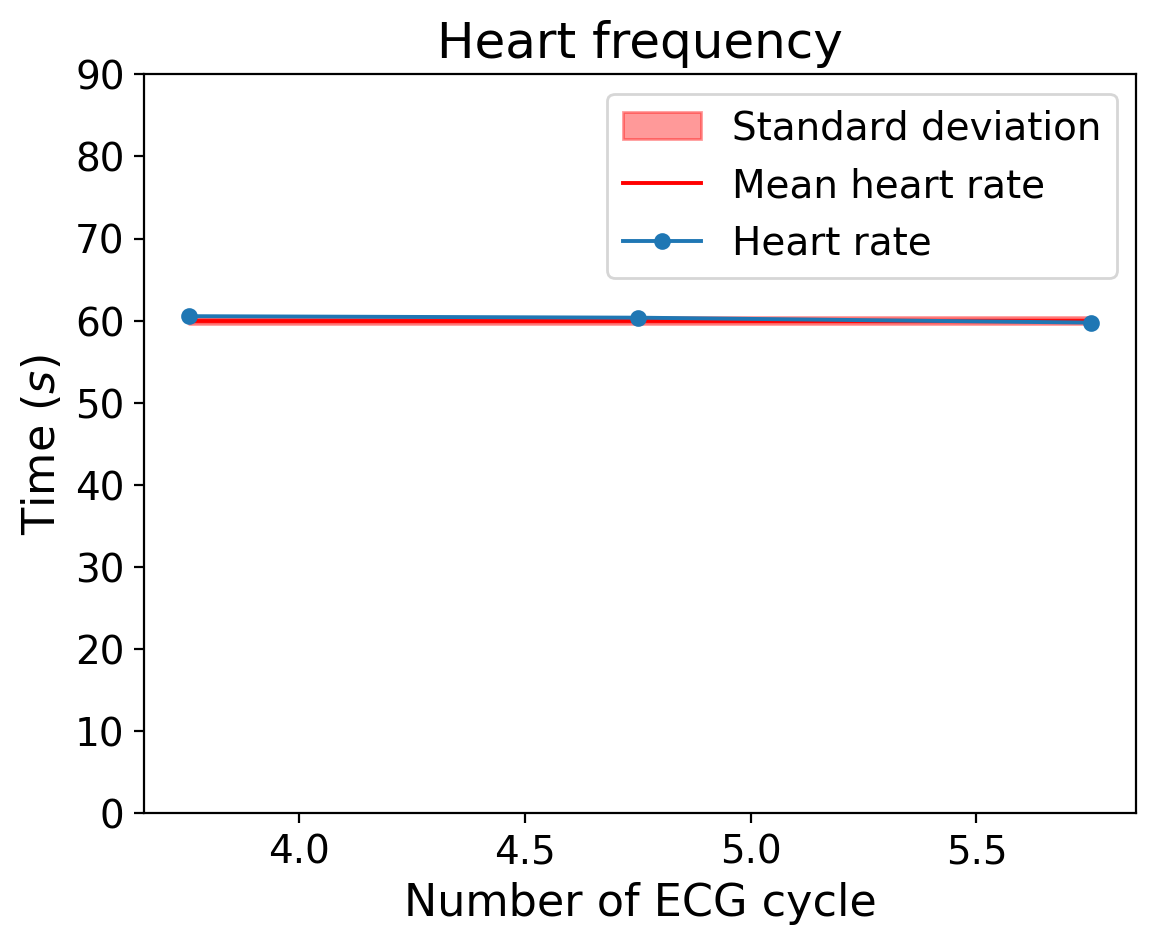

In [78]:
plt.fill_between(time[1:], std_vec_minus, std_vec_plus, facecolor="red",
                 label = "Standard deviation", color='red', alpha=0.4)
plt.plot(time[1:], mean_vec, c="r", label = "Mean heart rate")
plt.plot(time[1:], heart_rate, markersize=5, marker = "o", label="Heart rate")
plt.ylim((0, 90))
plt.title("Heart frequency")
plt.xlabel(r'Number of ECG cycle')
plt.ylabel(r'Time ($s$)')
plt.legend()
plt.show()

## Estimación de las frecuencias media de los archivos:

<img src = 'Grafica.jpg'>

Los archivos en los que no brindan su frecuencia cardiaca se denotaron con 'N/A', ya que el programa imprimía 0 como frecuencia cardiaca. La razón de esto se debe a que estos audios no poseían una línea de base estable, los picos R no eran superiores al valor máximo de la onda T y que los picos R no tenian la misma amplitud en cada ciclo.